## **Prediction using Decision Tree Classification Algorithm on the Given Iris Dataset**
#### Author - Subhajit Saha

#### **Objective:**
Create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, 
it would be able to predict the right class accordingly.

<h4><b>Importing Required Libraries</b></h4>

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import seaborn as ss
from sklearn.metrics import accuracy_score,precision_score,recall_score
from IPython.display import Image,display
ss.set_theme()

<h4><b>Importing the csv file and converting into a Dataframe<b></h4>

In [2]:
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<h4><b>Dropping the ID column and output the first 5 rows of the Dataframe for checking</b></h4>

In [3]:
iris = iris.drop(['Id'],axis=1)
iris.head()
iris.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


<h4><b>Separating the Target Column and storing it as an array</b></h4>

In [4]:
y = np.array(iris['Species'])

<h4><b>Deleting the Species column and storing the modified data into iris_modified Dataframe</b></h4>

In [5]:
iris_modified = iris.drop(['Species'],axis=1)
iris_modified.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<h4><b>Split Dataset into Testing and Training sets</b></h4>

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(iris_modified,y,random_state=22)

<h4><b>Importing and Defining the model</b></h4>

In [7]:
#Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
decision_model = DecisionTreeClassifier()

<h4><b>Fitting the Data</b></h4>

In [8]:
decision_model.fit(X_train,y_train)

DecisionTreeClassifier()

<h4><b>Analysing the Model performance using the metrics</b></h4>

In [9]:
print("Accuracy score: ",decision_model.score(X_test,y_test))

Accuracy score:  0.9210526315789473


In [10]:
y_pred = decision_model.predict(X_test)

In [11]:
from sklearn.metrics import precision_score
print("Precision Score:",precision_score(y_test,y_pred
                                         ,average="micro"))

Precision Score: 0.9210526315789473


In [12]:
from sklearn.metrics import recall_score
print("Recall score:",recall_score(y_test,y_pred,
                                  average="micro"))

Recall score: 0.9210526315789473


<h4><b>Finding out the Decision Tree on which the model operates</b></h4>

In [13]:
from sklearn.tree import export_graphviz
features = ['SepalLengthCm','PetalLengthCm',
           'SepalWidthCm','PetalWidthCm']
dot_file = export_graphviz(decision_model,feature_names=features)

In [14]:
import graphviz
graph = graphviz.Source(dot_file)
img = graph.render(filename='tree',format='png',cleanup=True)
display(img)

'tree.png'

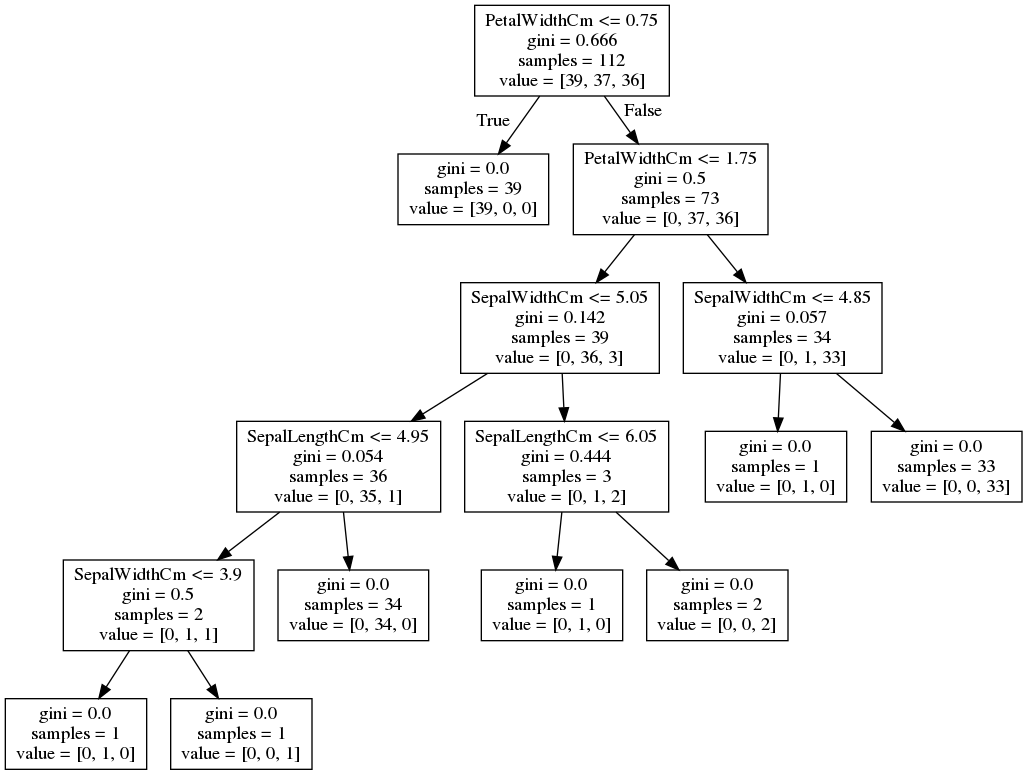

In [15]:
Image(filename="tree.png")

<h4><b>Analysing my model performance using K-Fold Cross validation</b></h4>
<h5>Using the Gini Score and Entropy Criterion Both</h5>

In [16]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5,shuffle=True)

In [17]:
X = iris_modified[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values

In [18]:
for criterion in ['gini','entropy']:
    print("Decision Tree - {}".format(criterion))
    accuracy = []
    precision = []
    recall = []
    for train_index,test_index in kf.split(iris_modified):
        X_train,X_test = X[train_index],X[test_index]
        y_train,y_test = y[train_index],y[test_index]
        
        dt = DecisionTreeClassifier(criterion=criterion)
        dt.fit(X_train,y_train)
        
        y_pred = dt.predict(X_test)
        
        accuracy.append(accuracy_score(y_test,y_pred))
        precision.append(precision_score(y_test,y_pred,average="micro"))
        recall.append(recall_score(y_test,y_pred,average="micro"))
    print("accuracy: ",np.mean(accuracy))
    print("precision: ",np.mean(precision))
    print("recall: ",np.mean(recall))

Decision Tree - gini
accuracy:  0.9666666666666666
precision:  0.9666666666666666
recall:  0.9666666666666666
Decision Tree - entropy
accuracy:  0.9466666666666667
precision:  0.9466666666666667
recall:  0.9466666666666667


<h4><b>Testing my model with dummy input data and analysing whether it's able to predict the class or not</b></h4>

('SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm') : (5.6,2.8,1.7,0.1) & (5.6,2.8,4.8,1.8)

In [19]:
print(dt.predict([[5.6,2.8,1.7,0.1]]))

['Iris-setosa']


In [20]:
print(dt.predict([[5.6,2.8,4.8,1.8]]))

['Iris-virginica']


<center><h2><b>Thank you for reading!!!Do Star the repo...</b></h2></center>